In [114]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

dT = 0.01  # it will be  changed

dirPath = os.path.abspath(os.path.dirname(''))
params_file='params.txt'
data_file='data.csv'
full_data_path = os.path.join(dirPath, data_file)
full_params_path = os.path.join(dirPath, params_file)

data_raw = pd.read_csv(full_data_path)
with open(full_params_path) as file:
    l = file.readline()
    file.readline()
    dT = float((l.split(' '))[1])


data = pd.DataFrame(data=data_raw)
interest_a = 1500
interest_b = 2000
dT = data['t'][1]-data['t'][0]
d = data[interest_a:interest_b] #19 30


n = 1   # granularity
#data[830:842]
data.tail(10)

,x,y,t,torque,steering_angle,long_acc,long_vel,lat_acc,lat_vel,yaw_angle,...,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r,track_progress,error
55253,26.3886,19.1086,55.253,29.3797,0.035701,0.178010,5.96113,-0.337186,-0.253628,0.870010,...,0.055711,0.064973,6309.37,6368.13,0.049055,0.056683,274.036,318.780,149.176,20.6512
55254,26.3926,19.1130,55.254,29.3797,0.035701,0.178043,5.96131,-0.336693,-0.253964,0.870144,...,0.055770,0.065025,6309.37,6368.13,0.049107,0.056728,274.321,319.029,149.176,20.6512
55255,26.3966,19.1174,55.255,29.3797,0.035701,0.178076,5.96149,-0.336202,-0.254300,0.870278,...,0.055829,0.065076,6309.37,6368.13,0.049159,0.056773,274.606,319.278,149.176,20.6512
55256,26.4007,19.1218,55.256,29.3797,0.035701,0.178109,5.96167,-0.335711,-0.254636,0.870412,...,0.055887,0.065128,6309.37,6368.13,0.049210,0.056818,274.890,319.526,149.176,20.6512
55257,26.4047,19.1262,55.257,29.3797,0.035701,0.178141,5.96184,-0.335220,-0.254971,0.870546,...,0.055946,0.065179,6309.37,6368.13,0.049262,0.056863,275.173,319.773,149.176,20.6512
55258,26.4087,19.1305,55.258,29.3797,0.035701,0.178174,5.96202,-0.334731,-0.255306,0.870680,...,0.056004,0.065231,6309.37,6368.13,0.049313,0.056907,275.456,320.021,149.176,20.6512
55259,26.4128,19.1349,55.259,29.3797,0.035701,0.178207,5.96220,-0.334242,-0.255640,0.870814,...,0.056063,0.065282,6309.37,6368.13,0.049365,0.056952,275.739,320.268,149.176,20.6512
55260,26.4168,19.1393,55.260,29.3797,0.035701,0.178239,5.96238,-0.333754,-0.255974,0.870948,...,0.056121,0.065333,6309.37,6368.13,0.049416,0.056997,276.021,320.514,149.176,20.6512
55261,26.4209,19.1437,55.261,29.3797,0.035701,0.178271,5.96256,-0.333267,-0.256307,0.871081,...,0.056179,0.065384,6309.37,6368.13,0.049467,0.057041,276.303,320.760,149.176,20.6512
55262,26.4249,19.1481,55.262,29.3797,0.035701,0.178304,5.96274,-0.332780,-0.256640,0.871215,...,0.056238,0.065436,6309.37,6368.13,0.049519,0.057086,276.584,321.006,149.176,20.6512


Text(0.5, 1.0, 'long_vel')

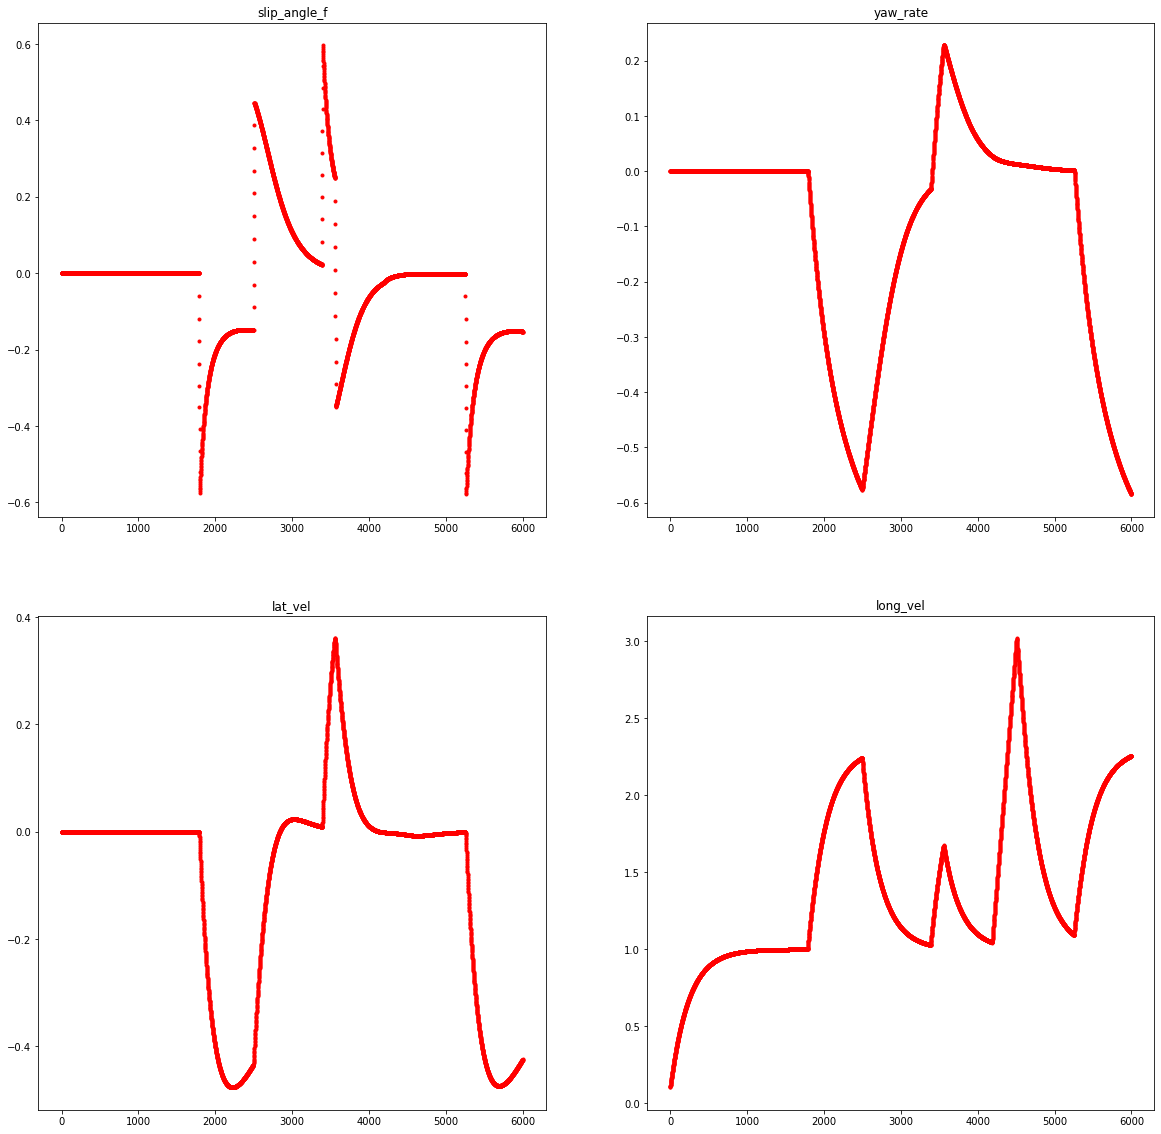

In [115]:
plt.figure(figsize=(20,20))
a = 0
b = 6000
ax = plt.subplot(221)
plt.plot(data['slip_angle_f'][a:b], '.r');
plt.title('slip_angle_f')

ax = plt.subplot(222)
plt.plot(data['yaw_rate'][a:b], '.r');
plt.title('yaw_rate')

ax = plt.subplot(223)
plt.plot(data['lat_vel'][a:b], '.r');
plt.title('lat_vel')

ax = plt.subplot(224)
plt.plot(data['long_vel'][a:b], '.r');
plt.title('long_vel')


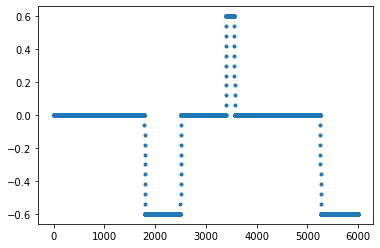

In [116]:
a = 0
b = 6000
plt.plot(data['steering_angle'][a:b], '.')

Text(0.5, 1.0, 'slip_angle_f')

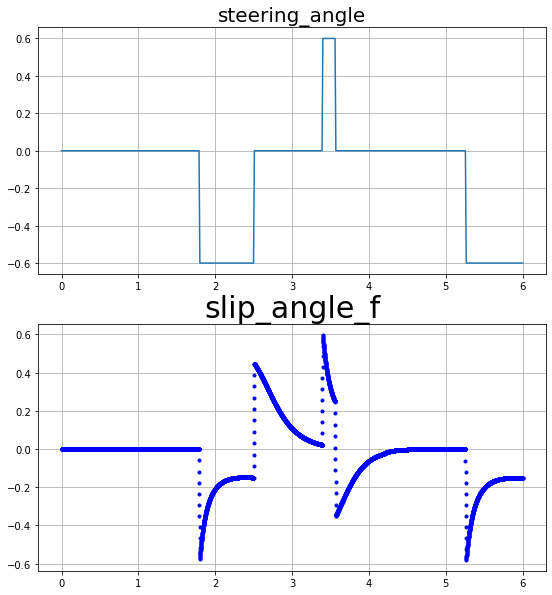

In [117]:
plt.figure(figsize=(20,10))
ax = plt.subplot(221)
plt.plot(data['t'][a:b], data['steering_angle'][a:b])
plt.grid(True)
plt.title('steering_angle', fontsize=20)
#ax.set_aspect('equal')


# x(t)
ax = plt.subplot(223)
plt.plot(data['t'][a:b], data['slip_angle_f'][a:b], '.b')
plt.grid(True)
plt.title('slip_angle_f', fontsize=30)

Text(0.5, 1.0, 'speed(t)')

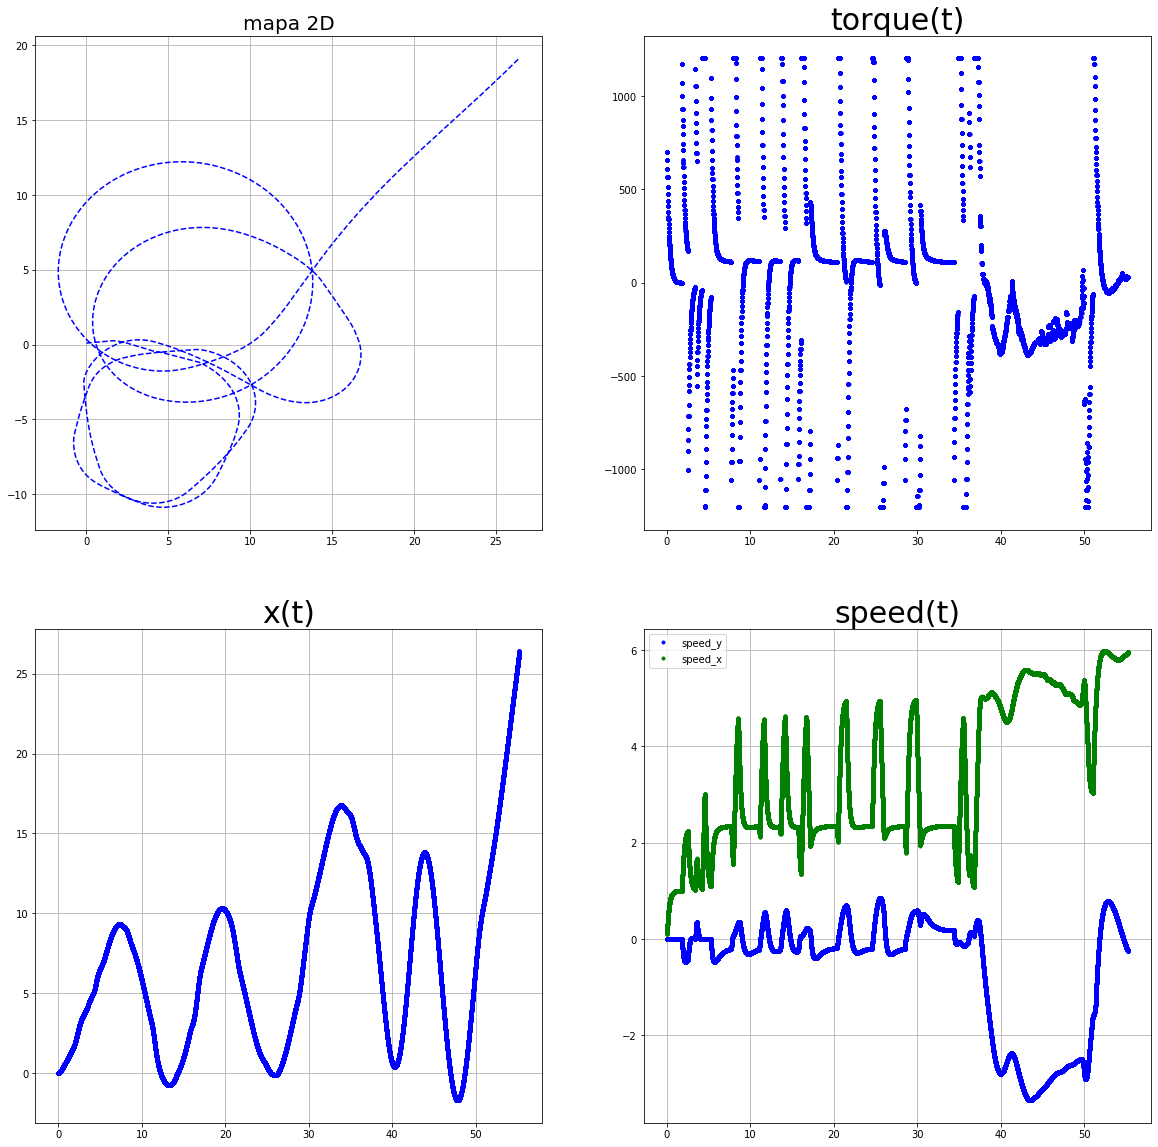

In [118]:
plt.figure(figsize=(20,20))
granularity = 1

x = data['x'][::granularity]
y = data['y'][::granularity]
t = data['t'][::granularity]
speed_x = data['long_vel'][::granularity]
speed_y = data['lat_vel'][::granularity]

# mapa 2d
ax = plt.subplot(221)
plt.plot(x, y, '--b')
plt.grid(True)
plt.title('mapa 2D', fontsize=20)
#ax.set_aspect('equal')


# x(t)
ax = plt.subplot(223)
plt.plot(t, x, '.b')
plt.grid(True)
plt.title('x(t)', fontsize=30)
#ax.set_aspect('equal')


# y(t)
#ax = plt.subplot(223)
#plt.plot(t, y, '--b')
#plt.grid(True)
#plt.title('y(t)', fontsize=30)
#ax.set_aspect('equal')

ax = plt.subplot(222)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

# speed
ax = plt.subplot(224)
ax.plot(t, speed_y, '.b', label='speed_y')
ax.plot(t, speed_x, '.g', label='speed_x',)
ax.grid(True)
ax.legend()
plt.title('speed(t)', fontsize=30)
#ax.set_aspect('equal')


[]

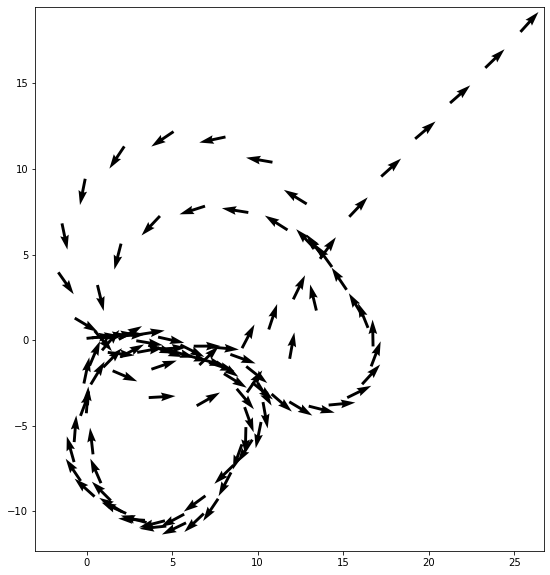

In [119]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 500

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

Text(0.5, 1.0, 'torque(t)')

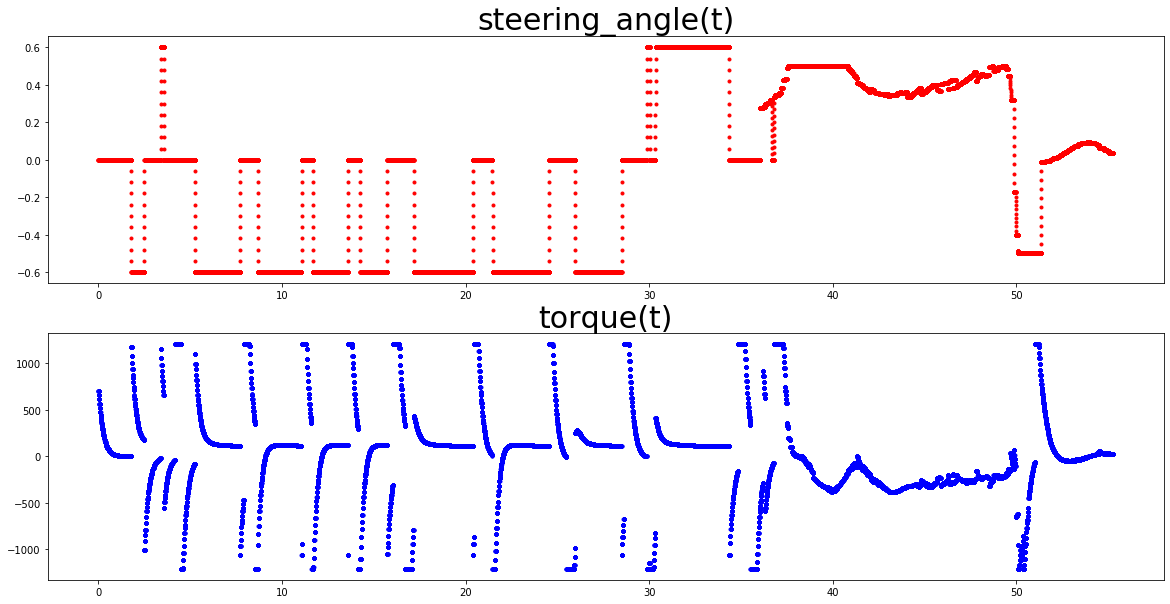

In [120]:
fig = plt.figure(figsize=(20,10))
granularity = 1
plt.subplot(211)
plt.plot(data['t'][:][::granularity], data['steering_angle'][:][::granularity], '.r')
plt.title('steering_angle(t)', fontsize=30)

plt.subplot(212)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

Text(0.5, 1.0, 'kąt(t)')

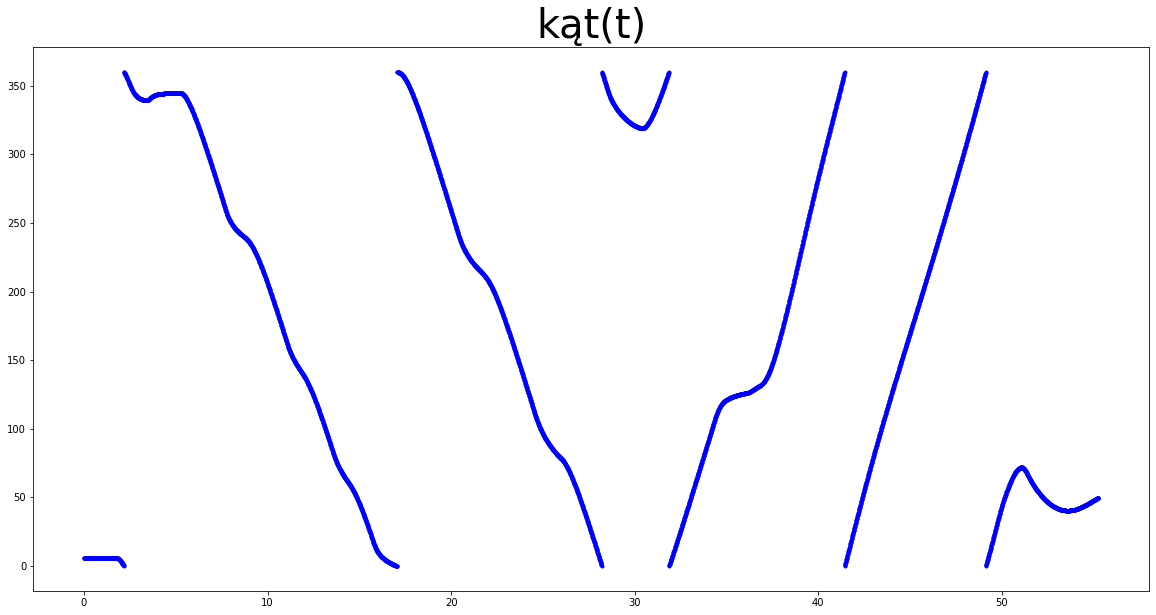

In [121]:
interest_a = 0
interest_b = 800
n = 10
yaw = np.rad2deg(np.unwrap(data['yaw_angle'][:][::n])) %360

max_yaw = np.max(yaw)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], yaw, '.b')
plt.title('kąt(t)', fontsize=40)

Text(0.5, 1.0, 'speed x and y')

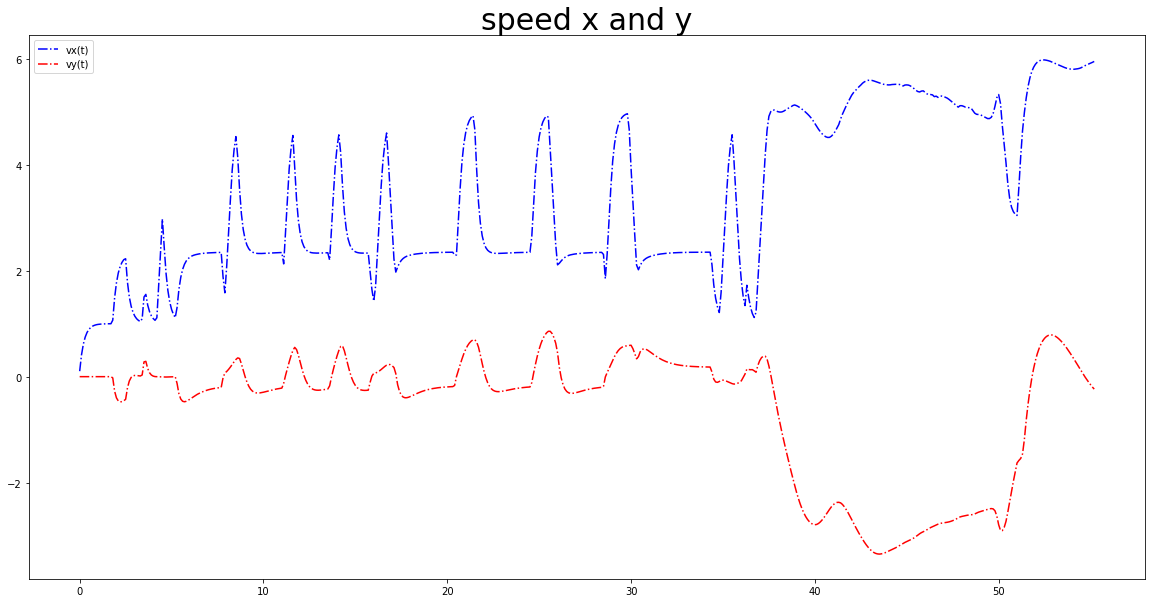

In [122]:
fig, ax = plt.subplots(figsize=(20,10))
max_speed = np.max([data['long_vel'], data['lat_vel']])
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
leg = ax.legend();
plt.title('speed x and y', fontsize=30)

Text(0.5, 1.0, 'slip_angle_front(t)')

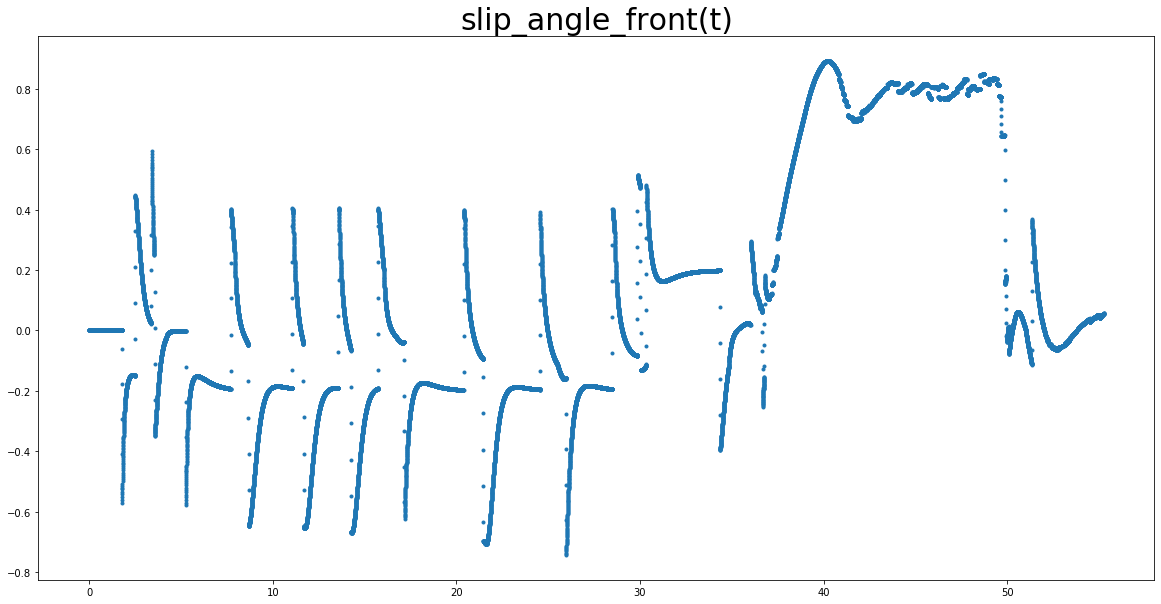

In [123]:
fig, ax = plt.subplots(figsize=(20,10))
slip_angle = data['slip_angle_f']
interest_a = 0
interest_b = 0
n = 2

max_slip = np.max([data['slip_angle_f'], data['slip_angle_r']])
ax.plot(data['t'][:][::n], slip_angle[:][::n], '.')
plt.title('slip_angle_front(t)', fontsize=30)
#ax.plot([angle_ch_t_1]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', \
#         [angle_ch_t_2]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', alpha=0.2)

Text(0.5, 1.0, 'vx^2 + vy^2')

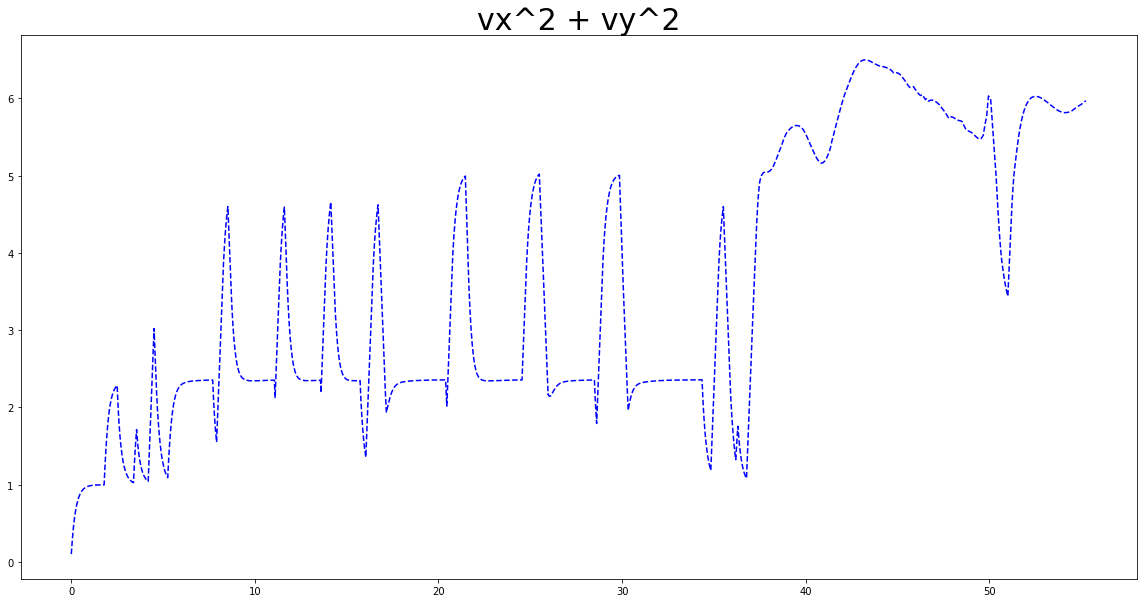

In [124]:
fig, ax = plt.subplots(figsize=(20,10))
energy_data = np.sqrt(data['long_vel'][:]**2 + data['lat_vel'][:]**2)
max_en = np.max(energy_data)

ax.plot(data['t'][:], energy_data, '--b')
plt.title('vx^2 + vy^2', fontsize=30)

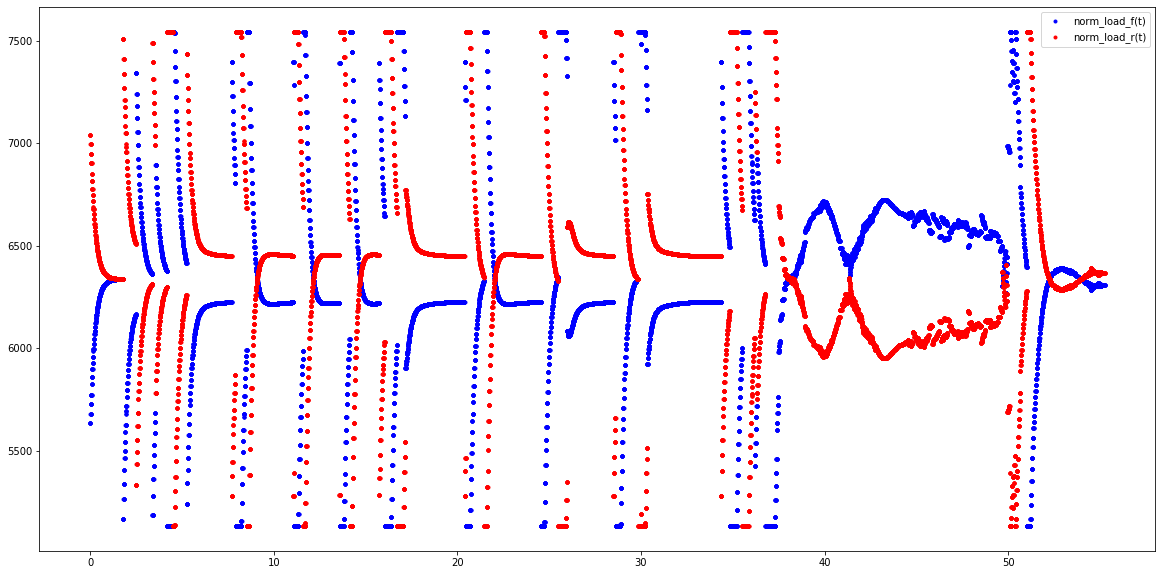

In [125]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], data['norm_load_f'][:][::n], '.b', label='norm_load_f(t)')
ax.plot(data['t'][:][::n], data['norm_load_r'][:][::n], '.r', label='norm_load_r(t)')
leg = ax.legend();

1.807358937893672

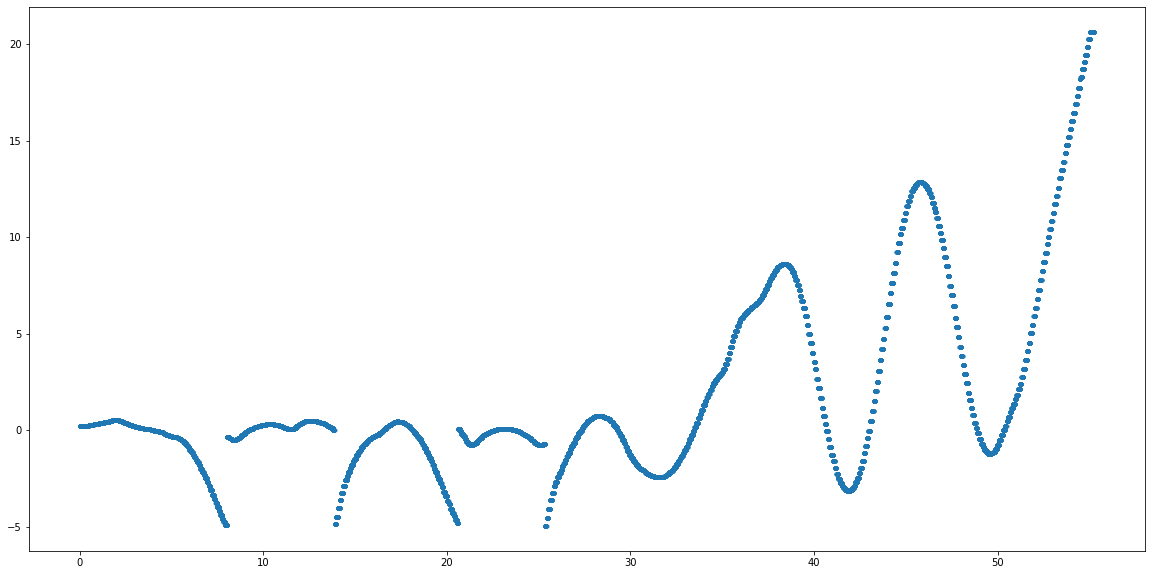

In [126]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'], data['error'], '.')
np.mean(data['error'])

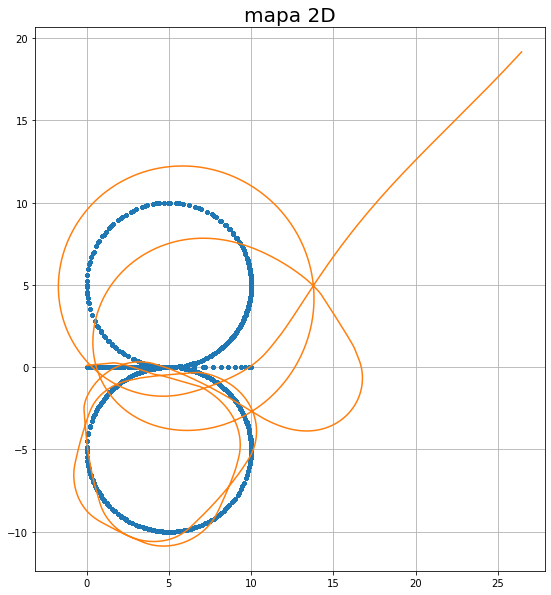

In [127]:
 import sys

skidpad_path = '/home/marcel/catkin_ws/src/skidpad_planner/scripts/'
sys.path.append(os.path.abspath(skidpad_path))
import skidpad

skid = skidpad.Skidpad(5,5,5)

#s = np.linspace(0, 10+40*np.pi, num=1000)


x = data['x'][::granularity]
y = data['y'][::granularity]
t = data['t'][::granularity]
track_progress = data['track_progress']

x_track = [5+skid.y(s) for s in track_progress]
y_track = [-skid.x(s) for s in track_progress]


fig = plt.figure(figsize=(20,10))
plt.plot(x_track[::1], y_track[::1], '.')
plt.plot(data['x'][:][::n], data['y'][:][::n])
plt.grid(True)
plt.title('mapa 2D', fontsize=20)
ax = plt.gca()
ax.set_aspect('equal')

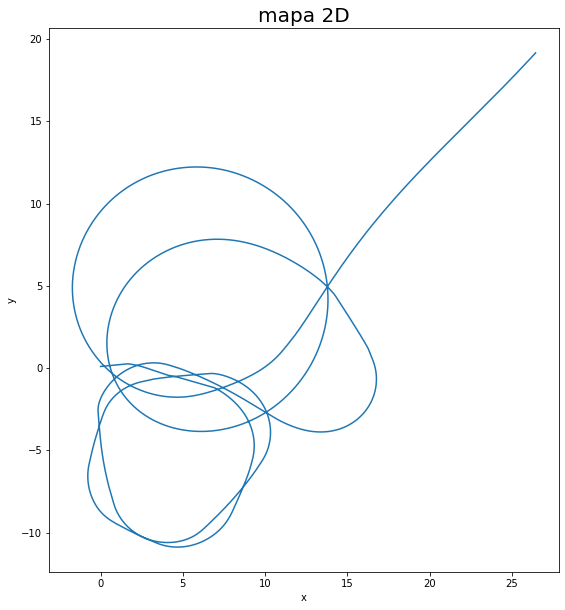

In [128]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

interest_a = 0
interest_b = 700

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][:][::n], data['y'][:][::n])

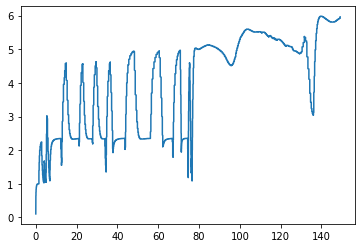

In [129]:
plt.plot(data['track_progress'][:][::n], data['long_vel'][:][::n])

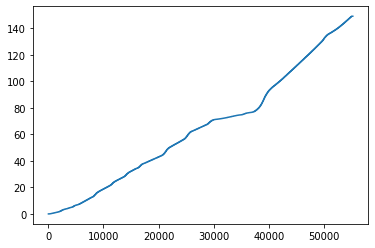

In [130]:
plt.plot(data['track_progress'])